In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sys
import math
import scipy

## カーネル

### パラメータ等

In [0]:
xx = np.arange(-4, 5, 0.2)
theta1 = 1.0
theta2 = 1.0
eta = 1e-6

### カーネル


In [0]:
def linear(x, x_d, b):
  return np.dot(x.T, x_d) + b

In [0]:
def exponential(x, x_d, theta1):
  return np.exp(- np.abs(x-x_d) / theta1 )

In [0]:
def periodic(x, x_d, theta1, theta2):
  return np.exp(theta1 * np.cos( np.abs(x-x_d) / theta2 ))

In [0]:
def gauss(x, x_d, theta1):
  return np.exp(- np.square( np.abs(x - x_d) ) / theta2 )

In [0]:
def matern(x, x_d, theta1, nyu):
  r = np.abs(x - x_d)
  
  if nyu == 1/2.0:
    return np.exp(- r / theta1)  
  
  elif nyu == 3/2.0:
    return (1 + np.sqrt(3) * r / theta1) * np.exp (- np.sqrt(3) * r / theta1)
  
  elif nyu == 5/2.0:
    return (1 + (np.sqrt(5) * r)/theta1 + (5 * r * r)/(3 * theta1 * theta1)) * np.exp (- np.sqrt(5) * r / theta1)
  
  elif nyu>=5/2.0:
    return np.exp(- (r*r)/(2*theta1*theta1))
  
  else:
    print ("===============================")
    print ("Specify other (nyu)")
    print ("===============================")

In [0]:
def kernels(x, x_d, b, theta1, theta2, nyu, name):
  if name == "linear":
    return linear(x, x_d, b)
  elif name == "exponential":
    return exponential(x, x_d, theta1)
  elif name == "periodic":
    return periodic(x, x_d, theta1, theta2)
  elif name == "gauss":
    return gauss(x, x_d, theta1)
  elif name == "matern":
    return matern(x, x_d, theta1, nyu)
  else:
    print ("===============================")
    print ("Not exist kernel")
    print ("===============================")
    sys.exit(-1)

### 計算

In [0]:
def calc_kernel(xx, eta, theta1, theta2, nyu, name):
  K = []
  b = np.random.randn()
  
  for i in range(len(xx)):
    for j in range(len(xx)):
      k = kernels(xx[i], xx[j], b, theta1, theta2, nyu, name)
      K.append(k)
  
  return np.array ( K ).reshape(len(xx), len(xx)) + eta * np.eye(len(xx))

### カーネル指定＆サンプル

In [21]:
##関数の数
N = 3
nyu = 0.5 #1.5, 2.5

###ここを変更
name = "linear"
#name = "exponential"
#name = "periodic"
#name = "gauss"
#name = "matern"

Y = []
for n in range(N):
  y = np.random.multivariate_normal(np.zeros(len(xx)), calc_kernel(xx, eta, theta1, theta2, nyu, name))
  Y.append(y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  del sys.path[0]


### plot

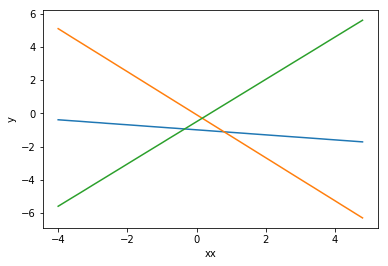

In [22]:
plt.figure()
plt.xlabel('xx')
plt.ylabel('y')

for i in range(len(Y)):
  plt.plot (xx, Y[i])
plt.show()